In [169]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [170]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [171]:
print("Data type: ", type(train))
print("Data dims: ", train.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (1460, 81)


In [172]:
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [173]:
trainx = train.select_dtypes(include = 'int64')

In [174]:
trainx.drop(["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"], axis = 1, inplace= True)

In [175]:
trainx.select_dtypes(include = 'int64')

,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,8450,706,0,150,856,856,854,0,1710,1,...,2,548,0,61,0,0,0,0,0,208500
1,9600,978,0,284,1262,1262,0,0,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,11250,486,0,434,920,920,866,0,1786,1,...,2,608,0,42,0,0,0,0,0,223500
3,9550,216,0,540,756,961,756,0,1717,1,...,3,642,0,35,272,0,0,0,0,140000
4,14260,655,0,490,1145,1145,1053,0,2198,1,...,3,836,192,84,0,0,0,0,0,250000
5,14115,732,0,64,796,796,566,0,1362,1,...,2,480,40,30,0,320,0,0,700,143000
6,10084,1369,0,317,1686,1694,0,0,1694,1,...,2,636,255,57,0,0,0,0,0,307000
7,10382,859,32,216,1107,1107,983,0,2090,1,...,2,484,235,204,228,0,0,0,350,200000
8,6120,0,0,952,952,1022,752,0,1774,0,...,2,468,90,0,205,0,0,0,0,129900
9,7420,851,0,140,991,1077,0,0,1077,1,...,1,205,0,4,0,0,0,0,0,118000


In [182]:
SalePrice = pd.DataFrame(trainx['SalePrice'])
LotArea = pd.DataFrame(trainx['LotArea'])

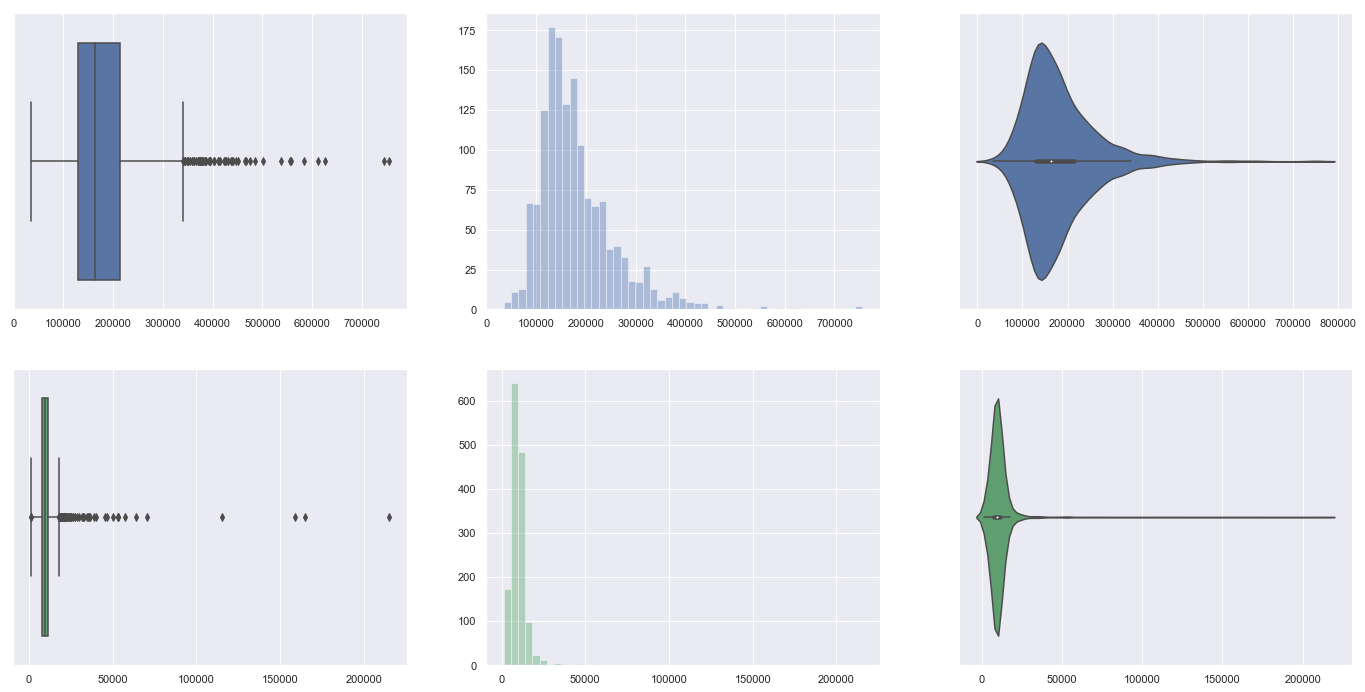

In [183]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(SalePrice, orient = "h", ax = axes[0,0])
sb.distplot(SalePrice, kde = False, ax = axes[0,1])
sb.violinplot(SalePrice, ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(LotArea, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(LotArea, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(LotArea, ax = axes[1,2], color = 'g')

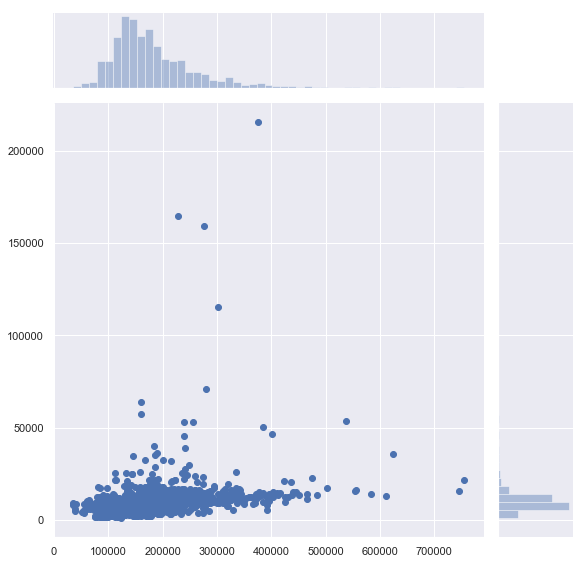

In [184]:
sb.jointplot(x = SalePrice, y = LotArea, height = 8)

In [185]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([LotArea, SalePrice.reindex(index=LotArea.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


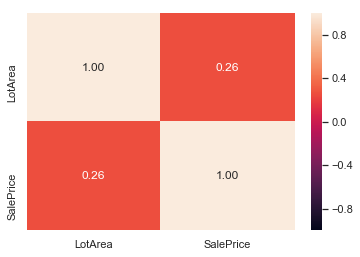

In [188]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")